In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
import random

In [2]:
def naive_sm(T, P):

    n, m = len(T), len(P)
    
    found = []

    for s in range(n-m+1):            

        sub_T = T[s:s+m]    
        
        j = 0

        while j < m:
            if sub_T[j] != P[j]:
                break
            j += 1

        if j == m:
            found.append(s)        
        
    return found

def rabin_karp_sm(T, P, d, q):

    n, m, d, q = len(T), len(P), d, q
    
    found = []
    h = 1
    p = 0
    t = 0
    
    for i in range(m-1):
        h = (h*d) % q

    for i in range(m):
        p = (d*p + ord(P[i])) % q
        t = (d*t + ord(T[i])) % q

    for i in range(n-m+1):
        if p == t:  
                      
            for j in range(m):
                if T[i+j] != P[j]:
                    break

            j += 1
            if j == m:
                found.append(i)                

        if i < n-m:
            t = (d*(t-ord(T[i])*h) + ord(T[i+m])) % q

            if t < 0:
                t = t+q

    return found

In [40]:
def generate_text(pattern, size=5000, seed=42):
    # lock random seed
    np.random.seed(seed)
    
    # generate 2000 random ascii char
    T = np.random.randint(ord('a'), ord('z'), size)
    
    # convert pattern into ascii
    p_ascii = [ord(i) for i in pattern]

    # insert ascii pattern into ascii char
    index = random.randint(0, len(T) - len(p_ascii))
    T[index:index+len(p_ascii)] = p_ascii

    # convert ascii char to text
    T = [chr(i) for i in T]

    return ''.join(T)

In [41]:
pattern = 'science'
T = generate_text(pattern)
d = 10
q = 13

In [42]:
def linear(x, a, b):
    return a * x + b

def quad(x, a, b): 
    return a * x**2 + b

def cube(x, a, b):
    return a * x**3 + b

def nlogn(a, x, b):
    return a * x * np.log(x) + b

### Naive String Matching

In [43]:
n_total_time = np.zeros(5000-len(pattern))

for i in range(5):
    times = []

    for j in tqdm(range(len(pattern),5000)):
        # start time
        start = time.time()

        # if j < len(pattern):
        #     naive_sm(T[:len(pattern)], pattern)
        # else:
        naive_sm(T[:j], pattern)


        # end time
        end = time.time() - start
        times.append(end)

    n_total_time += np.array(times)

n_mean_time = n_total_time / 5

100%|██████████| 4993/4993 [00:03<00:00, 1596.96it/s]


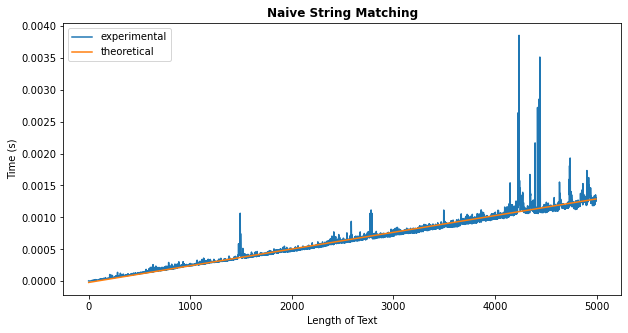

In [45]:
# plot graph
x = np.arange(1,5001-len(pattern))

plt.figure(figsize=(10,5))
plt.plot(x, n_mean_time, label='experimental')
props = curve_fit(linear, x, n_mean_time)
plt.plot(x, linear(x, *props[0]), label='theoretical')
plt.title('Naive String Matching', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Length of Text')
plt.legend()
plt.show()

### Rabin Karp String Matching

In [51]:
rk_total_time = np.zeros(5000-len(pattern))

for i in range(5):
    times = []

    for j in tqdm(range(len(pattern),5000)):
        # start time
        start = time.time()

        # if j < len(pattern):
        #     rabin_karp_sm(T[:len(pattern)], pattern, d, q)
        # else:
        rabin_karp_sm(T[:j], pattern, d, q)

        # end time
        end = time.time() - start
        times.append(end)

    rk_total_time += np.array(times)

rk_mean_time = rk_total_time / 5

100%|██████████| 4993/4993 [00:04<00:00, 1012.56it/s]


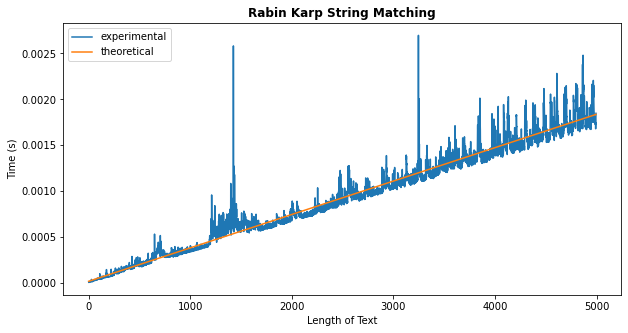

In [52]:
# plot graph
x = np.arange(1,5001-len(pattern))

plt.figure(figsize=(10,5))
plt.plot(x, rk_mean_time, label='experimental')
props = curve_fit(linear, x, rk_mean_time)
plt.plot(x, linear(x, *props[0]), label='theoretical')
plt.title('Rabin Karp String Matching', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Length of Text')
plt.legend()
plt.show()